In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns
import streamlit as st
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from pandas.tseries.offsets import DateOffset

In [2]:
fd=pd.read_excel("CO2 dataset.xlsx")
fd1=pd.read_excel("CO2 dataset.xlsx",header=0,index_col=0,parse_dates=True)

In [3]:
final_arima=ARIMA(fd1['CO2'],order=(7,1,2))
final_arima=final_arima.fit()

2022-11-27 20:49:09.831 
  command:

    streamlit run C:\Users\Shraddha\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


<Figure size 720x360 with 0 Axes>

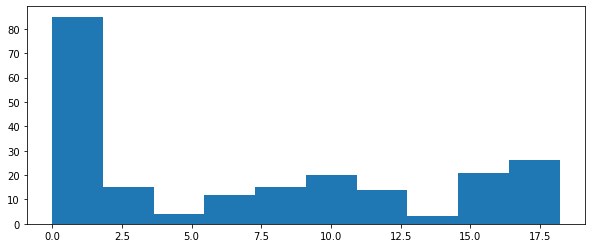

In [4]:
st.title('Forecasting Emission')
nav=st.sidebar.radio('Navigation',['Original','Prediction','Forecast'])
if nav == 'Original':
    st.subheader('Data')
    fd
    st.subheader('Scatter plot of the data')
    st.set_option('deprecation.showPyplotGlobalUse',False)
    plt.figure(figsize=(10,5))
    plt.scatter(fd['Year'],fd['CO2'])
    plt.ylim(0)
    plt.xlabel('Years')
    plt.ylabel('CO2 Emission')
    plt.tight_layout()
    st.pyplot()
    
    
    st.subheader('Line plot of the Data')
    st.line_chart(data=fd.CO2, width=150, height=300, use_container_width=True)
    
    st.subheader('Histogram of the Data')
    fig=plt.figure(figsize=(10,4))
    plt.hist(fd.CO2)
    st.pyplot(fig)
    
if nav == 'Prediction':
    predict = final_arima.fittedvalues
    fd1['Predicted_CO2'] = predict
    fd1
    plt.plot(fd1.CO2, label='Original',color='black')
    plt.plot(predict, label='Predicted',color='red')
    plt.title('Prediction')
    plt.legend(loc='upper left', fontsize=8)
    st.pyplot()
    
if nav == 'Forecast':
    year = st.slider('Select Year from 2015',1,51,step = 1)
    
    st.subheader('Forecasting the Data for next years')
    
    pred = final_arima.forecast(year)
    
    if st.button("Predict"):
        st.subheader(" Predicted CO2 Emission from year 2015")
        pred
        
        plt.plot(fd1.CO2, label='Original',color='black')
        plt.plot(pred, label='Forecasted',color='blue')
        plt.title('Forecasted')
        plt.legend(loc='upper left', fontsize=8)
        st.pyplot()
        
        st.subheader('Histogram of the Data')
        fig1=plt.figure(figsize=(10,4))
        plt.hist(pred)
        st.pyplot(fig1)

In [5]:
 #Local URL: http://localhost:8501
  #Network URL: http://192.168.1.11:8501